# <p style="text-align:center;color:#254E58"><b> LAB 01 - TITANIC </b></p>

---

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Thông tin thành viên</b></div>

- 21127115 - Trần Thanh Ngân
- 21127229 - Dương Trường Bình
- 21127616 - Lê Phước Quang Huy

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Mục lục</b></div>

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Các thư viện sử dụng</b></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Đọc dữ liệu</b></div>

In [2]:
train_df = pd.read_csv("../data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv("../data/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Loại bỏ cột Survived của tập train, sau đó ghép hai tập train và test lại với nhau.
# Tập dataset sau khi được ghép từ hai tập dữ liệu trên chính là tập chúng ta sẽ trực quan và phân tích.

train_df.drop(['Survived'], axis=1, inplace=True)
dataset = pd.concat([train_df, test_df], axis=0)
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>A. Mô tả dữ liệu</b></div>

## <span style='color:#003C43'> <b> Tổng quan </b> </span>

Bộ dữ liệu [Titanic](https://www.kaggle.com/c/titanic/data) chứa thông tin về dân số và hành khách từ 891 trong số 2224 hành khách và phi hành đoàn trên tàu Titanic. Tổng cộng có `1,309 dòng` và `11 cột` *(sau khi bỏ đi cột Survived)*. Ý nghĩa của từng cột được thể hiện ở bảng sau:

| STT | Tên thuộc tính | Mô tả | Giá trị | Kiểu dữ liệu |
|:--- | :---           |:---     |:---     |:---          |
| 1  | PassengerId | Mã định danh của hành khách | | Integer |
| 2  | Pclass  | Hạng vé | 1 = hạng 1, 2 = hạng 2, 3 = hạng 3 | Integer |
| 3  | Name | Tên hành khách | | String |
| 4  | Sex  | Giới tính | | String |
| 5  | Age  | Tuổi | | Decimal |
| 6  | SibSp  | Số anh chị em / vợ chồng trên tàu | | Integer |
| 7  | Parch  | Số cha mẹ / con cái trên tàu | | Integer |
| 8  | Ticket  | Số vé | | String |
| 9  | Fare | Giá vé hành khách | | Decimal |
| 10 | Cabin | Số cabin | | String |
| 11 | Embarked | Cảng lên tàu | C = Cherbourg, Q = Queenstown, S = Southampton | String |

## <span style='color:#003C43'> <b> Tỷ lệ missing rate </b> </span>

In [5]:
total_missing = dataset.isnull().sum()
missing_rate = round(total_missing / len(dataset) * 100, 1)
missing_rate_df = pd.DataFrame({
    'Thuộc tính': missing_rate.index, 
    'Tổng dữ liệu bị thiếu': total_missing, 
    'Tỉ lệ thiếu dữ liệu (%)': missing_rate.values
})

missing_rate_df['Tỉ lệ thiếu dữ liệu (%)'] = missing_rate_df['Tỉ lệ thiếu dữ liệu (%)'].apply(lambda x: round(x, 1))
missing_rate_df = missing_rate_df.sort_values(by="Tỉ lệ thiếu dữ liệu (%)", ascending=False)

missing_rate_df = missing_rate_df.reset_index(drop=True)
missing_rate_df.index += 1

styled_missing_rate_df = missing_rate_df.style.background_gradient(axis=0, gmap=missing_rate_df['Tỉ lệ thiếu dữ liệu (%)'], cmap='Reds').format({'Tỉ lệ thiếu dữ liệu (%)': '{:.1f}'})
styled_missing_rate_df

,Thuộc tính,Tổng dữ liệu bị thiếu,Tỉ lệ thiếu dữ liệu (%)
1,Cabin,1014,77.5
2,Age,263,20.1
3,Embarked,2,0.2
4,Fare,1,0.1
5,PassengerId,0,0.0
6,Pclass,0,0.0
7,Name,0,0.0
8,Sex,0,0.0
9,SibSp,0,0.0
10,Parch,0,0.0


Fill các giá trị bị thiếu bằng -1

In [6]:
dataset = dataset.fillna(-1)

Tiếp theo, ta sẽ tạo thêm một thuộc tính mới `Family`, bởi vì SibSp và Parch sẽ có ý nghĩa hơn khi là một thuộc tính kết hợp biểu thị tổng số người thân mà một người có trên tàu Titanic.

In [7]:
dataset['Family'] = dataset['SibSp'] + dataset['Parch']

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Family       1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>B. EDA</b></div>

In [9]:
# Chia thành 2 loại dữ liệu numerical và categorical
cate_list = list(dataset.dtypes[dataset.dtypes == 'object'].index)
num_list = list(dataset.dtypes[dataset.dtypes != 'object'].index)

## <span style='color:#003C43'> <b> 1. Dữ liệu Numerical </b> </span>

### <span style='color:#003C43'> Thống kê mô tả các cột numerical </span>

In [10]:
dataset[num_list].describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,23.676600,0.498854,0.385027,33.269280,0.883881
std,378.020061,0.837836,17.866186,1.041658,0.865560,51.747562,1.583639
min,1.000000,1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000
25%,328.000000,2.000000,7.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,10.000000


### <span style='color:#003C43'> Nhận xét: </span>

<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- PassengerId: Bộ dữ liệu hiện tại chứa thông tin về `1043` hành khách.
- Pclass: Hạng vé trung bình là khoảng 2.2, cho thấy hầu hết hành khách ở hạng vé `thứ hai hoặc thứ ba`.
- Age: Tuổi trung bình của hành khách là khoảng 29.8 tuổi, với độ lệch chuẩn là 14.37. Độ tuổi dao động `từ 0.17 (khoảng 2 tháng) đến 80 tuổi`.
- SibSp: Trung bình, hành khách có khoảng 0.5 anh chị em hoặc vợ chồng trên tàu, với số lớn nhất là `8`.
- Parch: Trung bình, hành khách có khoảng 0.42 bố mẹ hoặc con cái trên tàu, với số lớn nhất là `6`.
- Fare: Giá trung bình mà hành khách trả là `$36.60`, với độ lệch chuẩn là $55.75. Giá vé thấp nhất là $0.00, và giá vé cao nhất là $512.33.
- Family: Trung bình, hành khách có khoảng 0.9 người thân trên tàu, với số lớn nhất là `10`.

### <span style='color:#003C43'> Phân phối của các thuộc tính numerical </span>

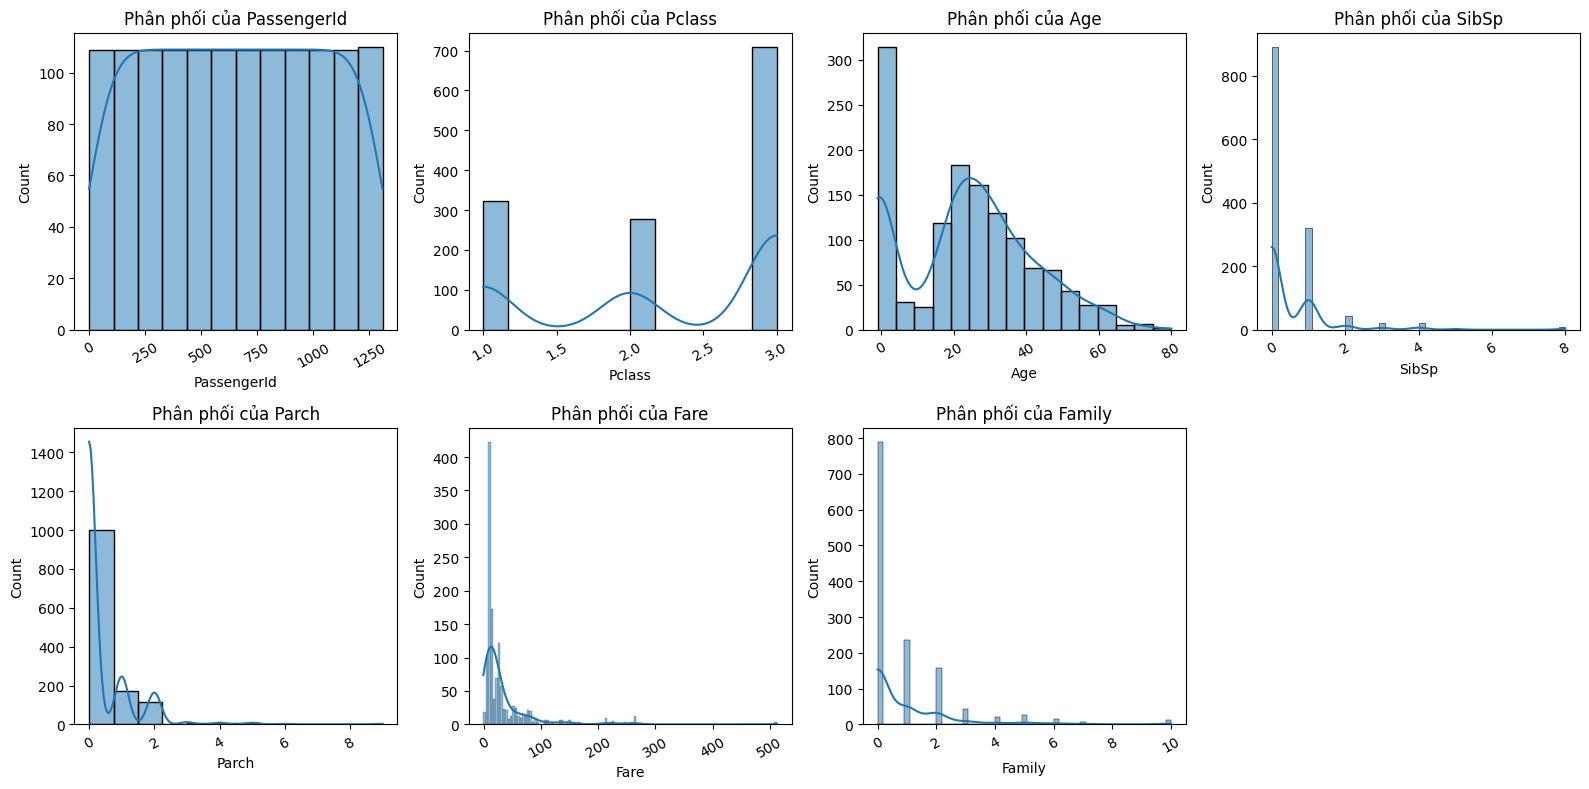

In [11]:
n_cols = len(num_list)
n_rows = n_cols // 4 + (1 if n_cols % 4 != 0 else 0)

plt.figure(figsize=(16, 4 * n_rows))
for i, col in enumerate(num_list, 1):
    plt.subplot(n_rows, 4, i)
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Phân phối của {col}')
    plt.xlabel(col)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

## <span style='color:#003C43'> <b> 2. Dữ liệu Categorical </b> </span>

### <span style='color:#003C43'> Thống kê mô tả các cột categorical </span>

In [12]:
dataset[cate_list].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,1309,1309
unique,1307,2,929,187,4
top,"Connolly, Miss. Kate",male,CA. 2343,-1,S
freq,2,843,11,1014,914


### <span style='color:#003C43'> Nhận xét: </span>

<div style="border-radius:10px;border:#0C6A86 solid;padding: 5px;background-color:#ebfae8;font-size:110%;text-align:left;color:black">

- Name: Có 1307 giá trị duy nhất trong số 1309 mẫu dữ liệu, chỉ có 2 mẫu dữ liệu trùng lặp. Mỗi hành khách có một tên duy nhất, tuy nhiên có thể có các trường hợp trùng tên.
- Sex: Chỉ có 2 giá trị duy nhất là 'male' và 'female', được chia thành `843 nam` và `466 nữ`.
- Ticket: Có 929 giá trị duy nhất trong số 1309 mẫu dữ liệu. Có một số vé trùng lặp, đặc biệt là vé `CA. 2343` với tần suất xuất hiện cao nhất là `11 lần`.
- Cabin: Có 187 giá trị duy nhất trong số 1309 mẫu dữ liệu. Có 1014 mẫu dữ liệu không có thông tin về phòng (-1).
- Embarked: Có 3 giá trị về cảng là 'S', 'C', 'Q', và 1 giá trị không xác định. Cảng S có tần suất xuất hiện cao nhất với 914 mẫu dữ liệu.

### <span style='color:#003C43'> Phân phối của các thuộc tính categorical </span>

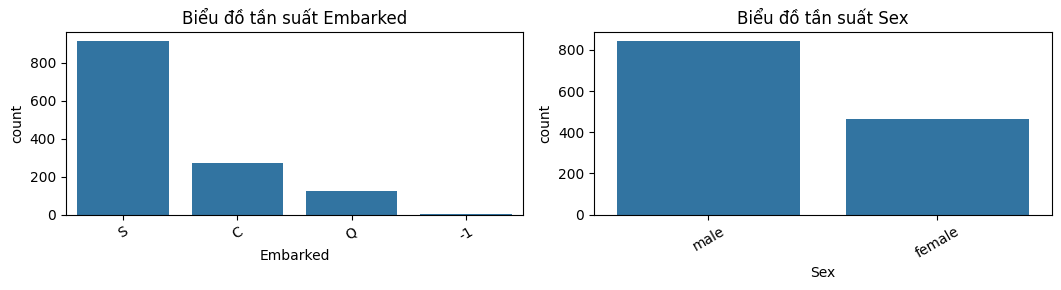

In [13]:
cate_cols_plot = list(set(cate_list) - set(['Name', 'Ticket', 'Cabin']))
n_cols = len(cate_cols_plot)
n_rows = n_cols // 3 + (1 if n_cols % 3 != 0 else 0)

plt.figure(figsize=(16, 3 * n_rows))
for i, col in enumerate(cate_cols_plot, 1):
        plt.subplot(n_rows, 3, i)
        sns.countplot(x=col, data=dataset)
        plt.title(f'Biểu đồ tần suất {col}')
        plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

### <span style='color:#003C43'> <b> 3. Phân tích hệ số tương quan giữa các thuộc tính numerical </b></span>

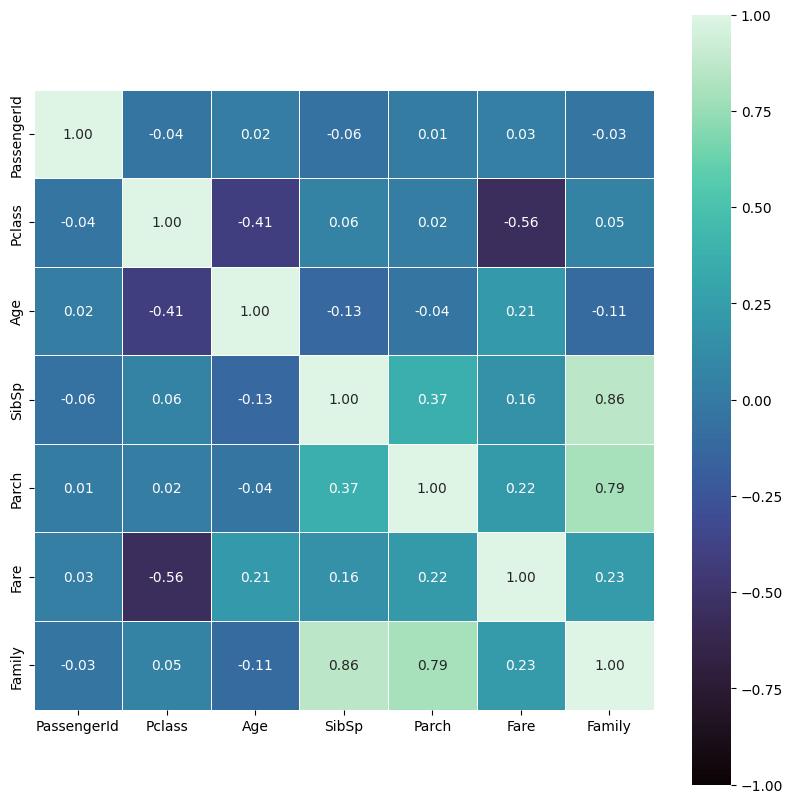

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset[num_list].corr(), annot=True, fmt=".2f", linewidths=.5, square=True, vmin=-1, vmax=1, cmap="mako")
plt.show()

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>C. Phân tích dữ liệu</b></div>

# <div style="padding:10px;color:white;margin:0;font-size:15px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Câu hỏi 0: Thông tin về thuyền trưởng</b></div>

In [15]:
dataset[dataset['Name'].str.contains("Capt")]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
745,746,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2


# <div style="padding:10px;color:white;margin:0;font-size:15px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Câu hỏi 1: Phân phối độ tuổi của hành khách theo giới tính là như thế nào và liệu có sự khác biệt đáng kể giữa nam và nữ không?</b></div>

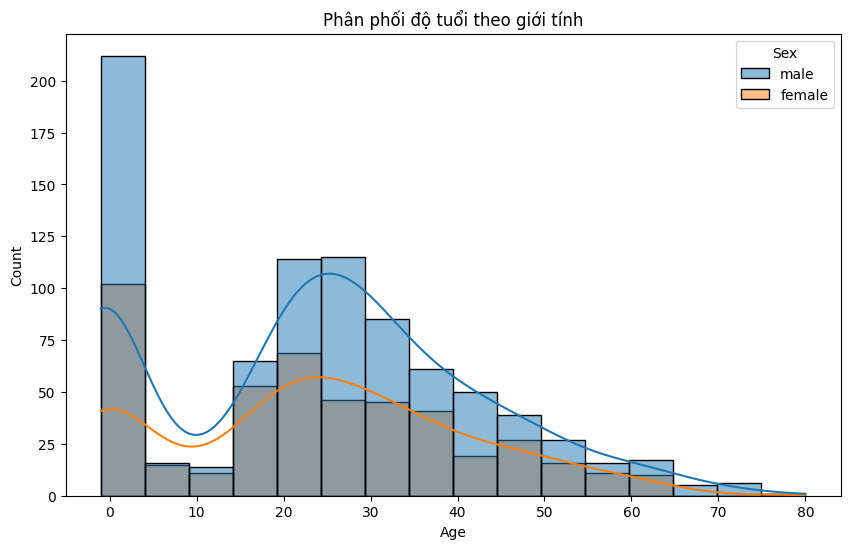

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Age', kde=True, hue='Sex')
plt.title('Phân phối độ tuổi theo giới tính')
plt.show()

# <div style="padding:10px;color:white;margin:0;font-size:15px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Câu hỏi 2: Liệu có sự ảnh hưởng nào giữa giới tính đối với giá vé và hạng vé không?</b></div>

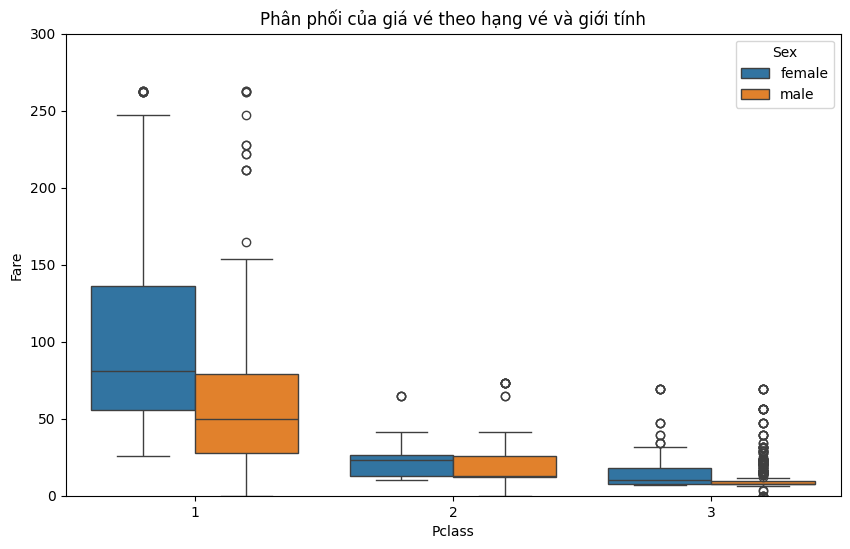

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='Pclass', y='Fare', hue='Sex')
plt.ylim(0, 300)
plt.title('Phân phối của giá vé theo hạng vé và giới tính')
plt.show()

# <div style="padding:10px;color:white;margin:0;font-size:15px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Câu hỏi 3: Phân tích mối tương quan giữa giới tính đối với số anh chị em/ vợ chồng và bố mẹ/ con cái mà một hành khách sẽ dẫn theo?</b></div>

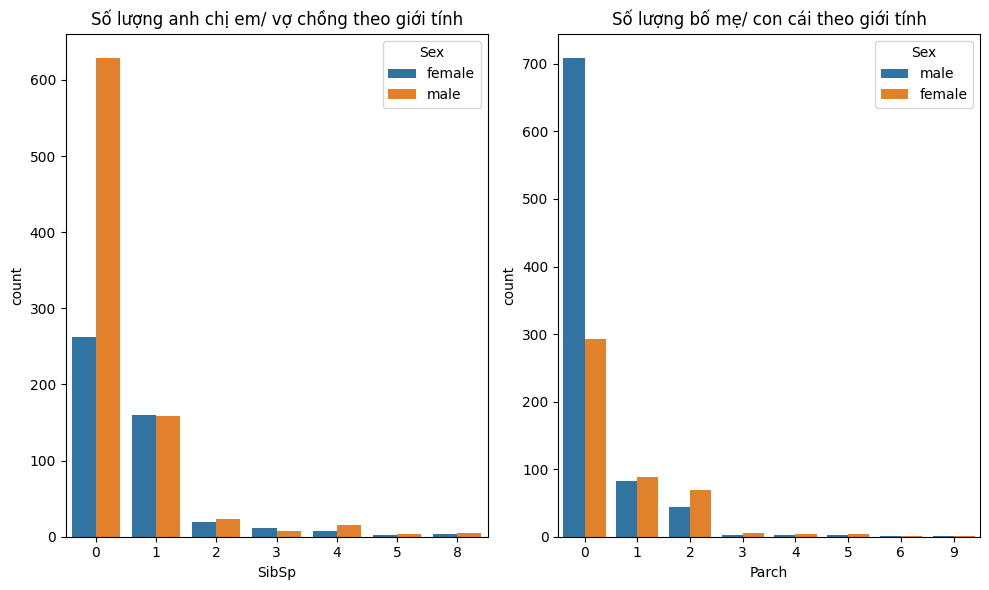

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.countplot(data=dataset, x='SibSp', hue='Sex', ax=axes[0])
axes[0].set_title('Số lượng anh chị em/ vợ chồng theo giới tính')

sns.countplot(data=dataset, x='Parch', hue='Sex', ax=axes[1])
axes[1].set_title('Số lượng bố mẹ/ con cái theo giới tính')

plt.tight_layout()
plt.show()

# <div style="padding:10px;color:white;margin:0;font-size:15px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Câu hỏi 4: Mỗi hành khách nam và nữ có xu hướng dẫn theo bao nhiêu thành viên trong gia đình? Từ đó so sánh với mối quan hệ giữa độ tuổi và số lượng thành viên gia đình?</b></div>

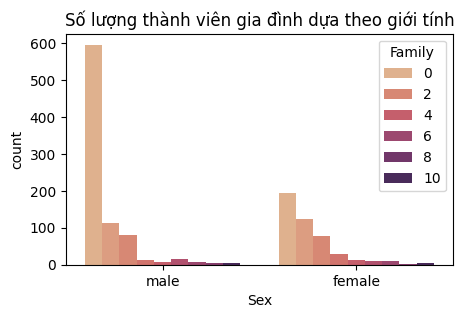

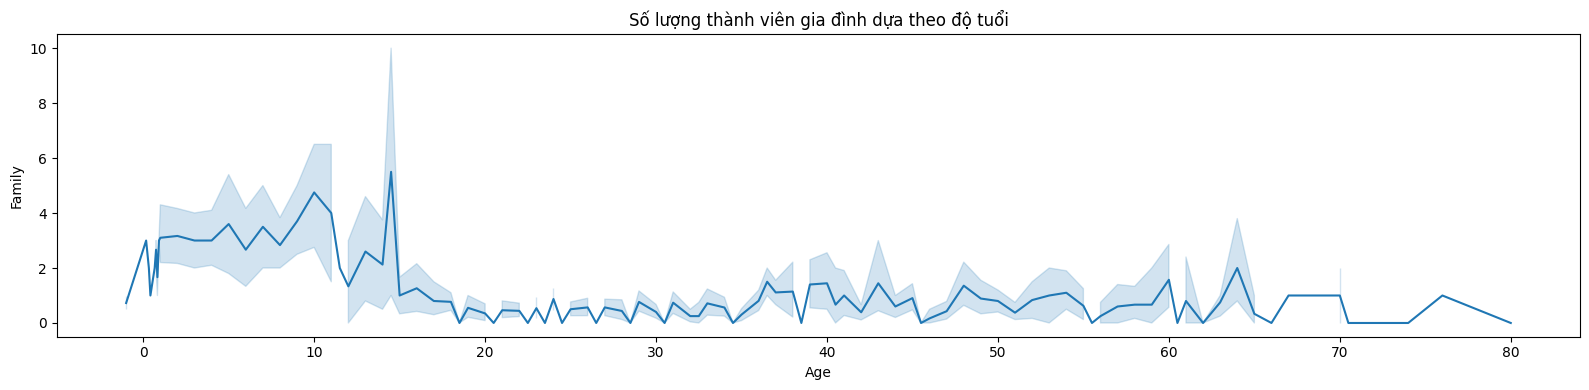

In [19]:
plt.figure(figsize=(5, 3))
sns.countplot(data=dataset, x='Sex', hue='Family', palette='flare')
plt.title('Số lượng thành viên gia đình dựa theo giới tính')

plt.figure(figsize=(16, 4))
sns.lineplot(x='Age', y='Family', data=dataset)
plt.title('Số lượng thành viên gia đình dựa theo độ tuổi')

plt.tight_layout()
plt.show()

# <div style="padding:10px;color:white;margin:0;font-size:15px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Câu hỏi 5: Phân tích mối liên hệ giữa Giới tính, Độ tuổi trong việc lựa chọn Hạng vé và Cảng?</b></div>

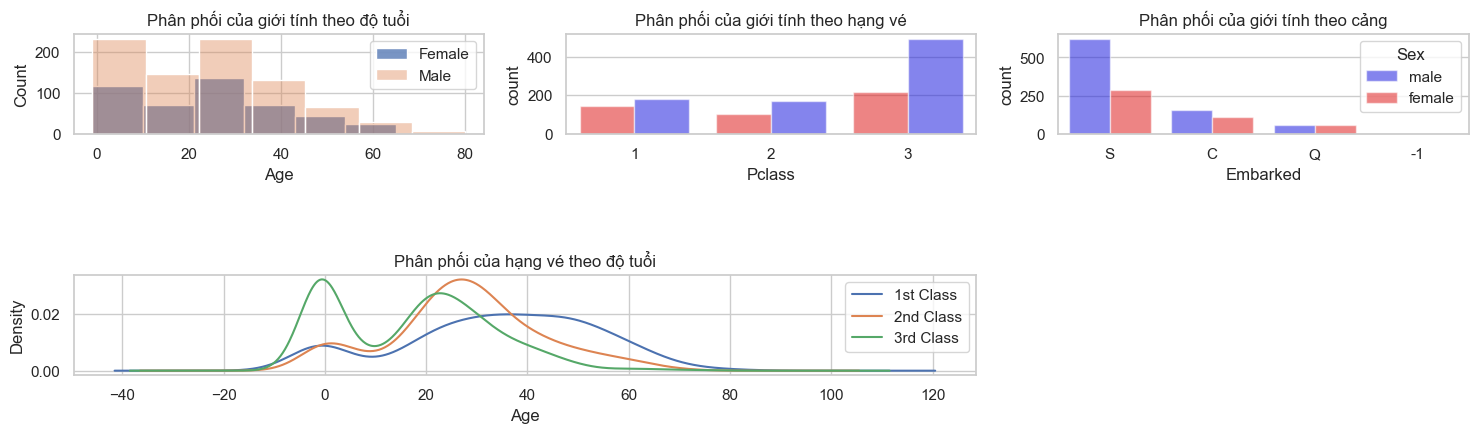

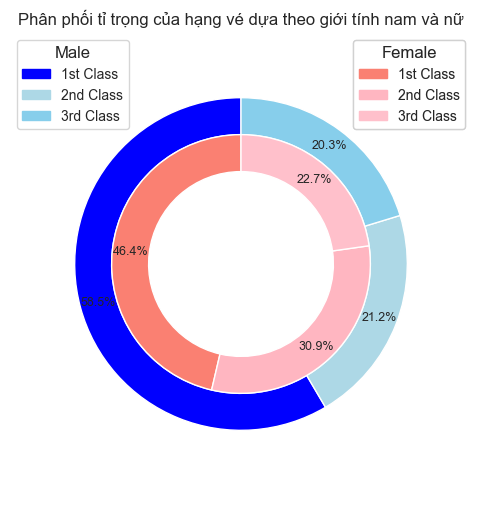

In [36]:
fig = plt.figure(figsize=(18,6)) 

ax1 = plt.subplot2grid((4,3),(0,0))  
sns.histplot(dataset['Age'][(dataset['Sex'] == 'female')], bins=7, label='Female', multiple='layer')
sns.histplot(dataset['Age'][(dataset['Sex'] == 'male')], bins=7, label='Male', alpha=.4, multiple='layer')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Phân phối của giới tính theo độ tuổi')
plt.legend()


custom_palette = {'male': 'blue', 'female': 'red'}

ax2 = plt.subplot2grid((4,3),(0,1))
sns.countplot(x='Pclass', hue='Sex', data=dataset, ax=ax2, alpha=0.55, palette=custom_palette)
plt.title("Phân phối của giới tính theo hạng vé")
ax2.legend_.remove()

ax3 = plt.subplot2grid((4,3),(0,2))
sns.countplot(x='Embarked', hue='Sex', data=dataset, ax=ax3, alpha=0.55, palette=custom_palette)
plt.title("Phân phối của giới tính theo cảng")


ax4 = plt.subplot2grid((4,3),(2,0), colspan=2)
dataset.Age[dataset.Pclass == 1].plot(kind='kde')    
dataset.Age[dataset.Pclass == 2].plot(kind='kde')
dataset.Age[dataset.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Phân phối của hạng vé theo độ tuổi")
plt.legend(('1st Class', '2nd Class','3rd Class'), loc='best') 
# plt.show()

# Tạo dữ liệu cho biểu đồ tròn
male_counts = dataset[dataset['Sex'] == 'male']['Pclass'].value_counts()
female_counts = dataset[dataset['Sex'] == 'female']['Pclass'].value_counts()

# Tạo biểu đồ tròn
plt.figure(figsize=(6, 6))

# Biểu đồ tròn cho giới tính nam
plt.pie(male_counts, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=0.89, startangle=90, colors=['blue', 'lightblue', 'skyblue'], radius=0.9, wedgeprops=dict(width=0.2))
# Biểu đồ tròn cho giới tính nữ
plt.pie(female_counts, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=0.86, startangle=90, colors=['salmon', 'lightpink', 'pink'], radius=0.7, wedgeprops=dict(width=0.2))

# Thêm chú thích
male_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(['blue', 'lightblue', 'skyblue'], ['1st Class', '2nd Class', '3rd Class'])]
plt.gca().add_artist(plt.legend(handles=male_patches, loc='upper left', title='Male', fontsize='small'))

female_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(['salmon', 'lightpink', 'pink'], ['1st Class', '2nd Class', '3rd Class'])]
plt.gca().add_artist(plt.legend(handles=female_patches, loc='upper right', title='Female', fontsize='small'))

plt.title('Phân phối tỉ trọng của hạng vé dựa theo giới tính nam và nữ')
plt.show()

# <div style="padding:10px;color:white;margin:0;font-size:15px;font-family:Verdana;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Câu hỏi 6: Phân tích mối quan hệ giữa Giới tính, Độ tuổi đối với số thành viên gia đình?</b></div>

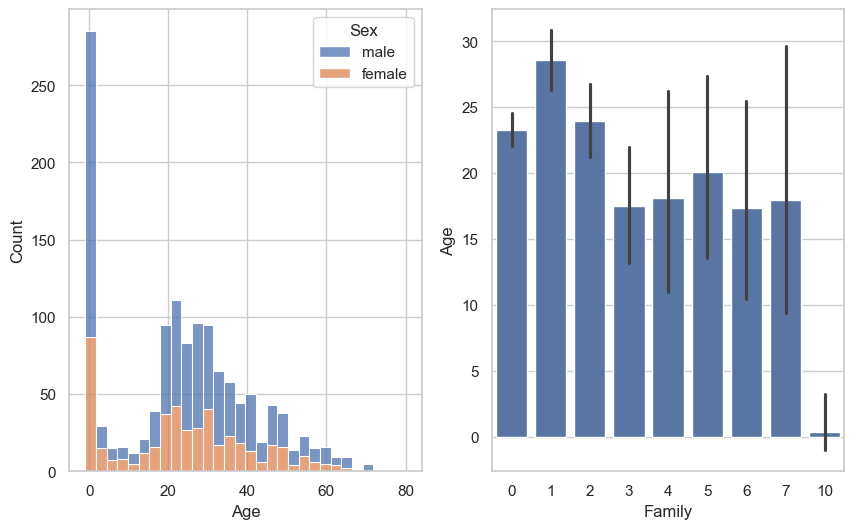

In [22]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
sns.histplot(data=dataset, x='Age', hue='Sex', multiple='stack', bins=30, ax=axes[0])
sns.barplot(x='Family', y='Age', data=dataset, ax=axes[1])
plt.show()

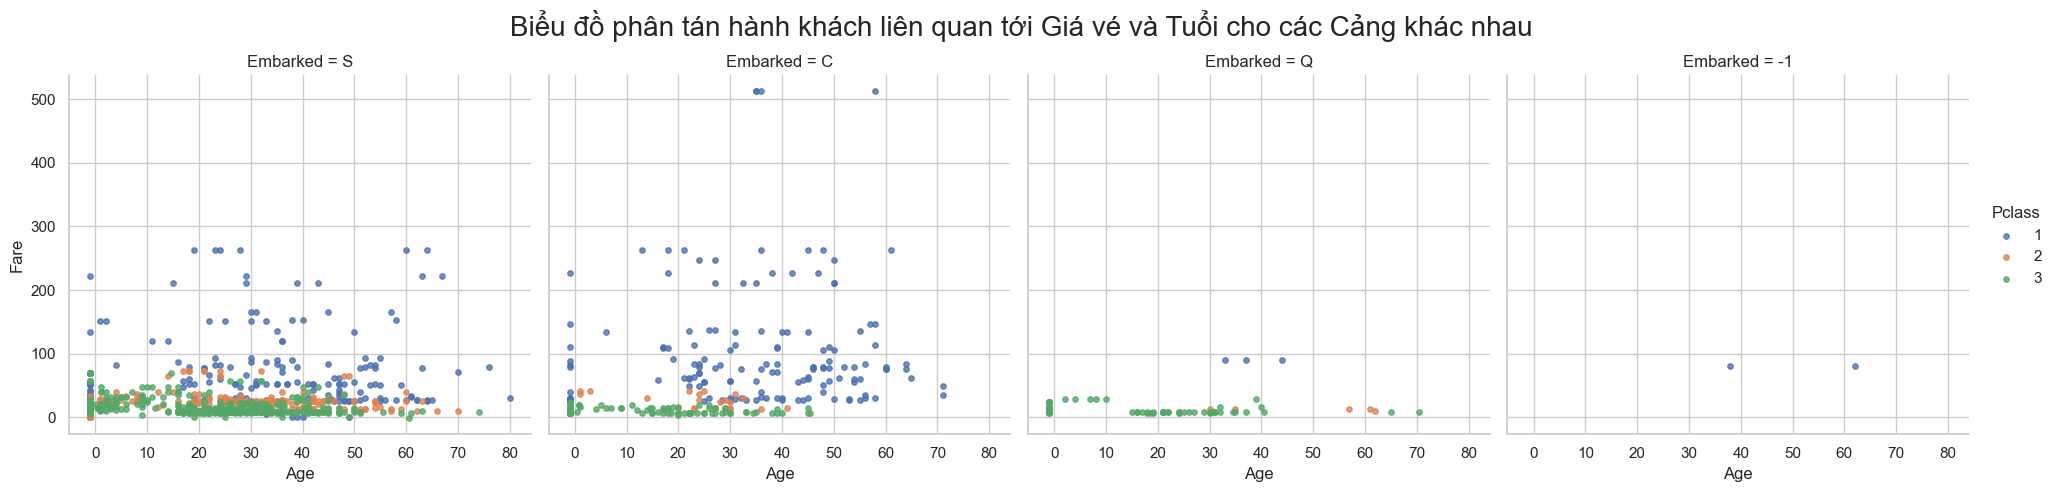

In [23]:
sns.lmplot(x='Age', y='Fare', data=dataset, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 15})
plt.subplots_adjust(top=0.85)
plt.suptitle('Biểu đồ phân tán hành khách liên quan tới Giá vé và Tuổi cho các Cảng khác nhau', fontsize=20)
plt.show()